<a href="https://colab.research.google.com/github/msmsd778/covid19-severity-clustering/blob/main/covid_severity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from pycaret.clustering import *
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Data

Next 2 cells is for reading the data from personal google drive.

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# df = pd.reaPreparing data for analysisd_csv("/content/drive/MyDrive/Cleaned-Data.csv")
# df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


Read the data using the cell below.

In [ ]:
df = pd.read_csv('Cleaned-Data.csv')
df.head()

Execute the following cell if you don't have pycaret package installed.

In [ ]:
# pip install pycaret

In [77]:
del df['Country']
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df.drop_duplicates()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
31676,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
31677,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
31678,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


# Data Visaulization

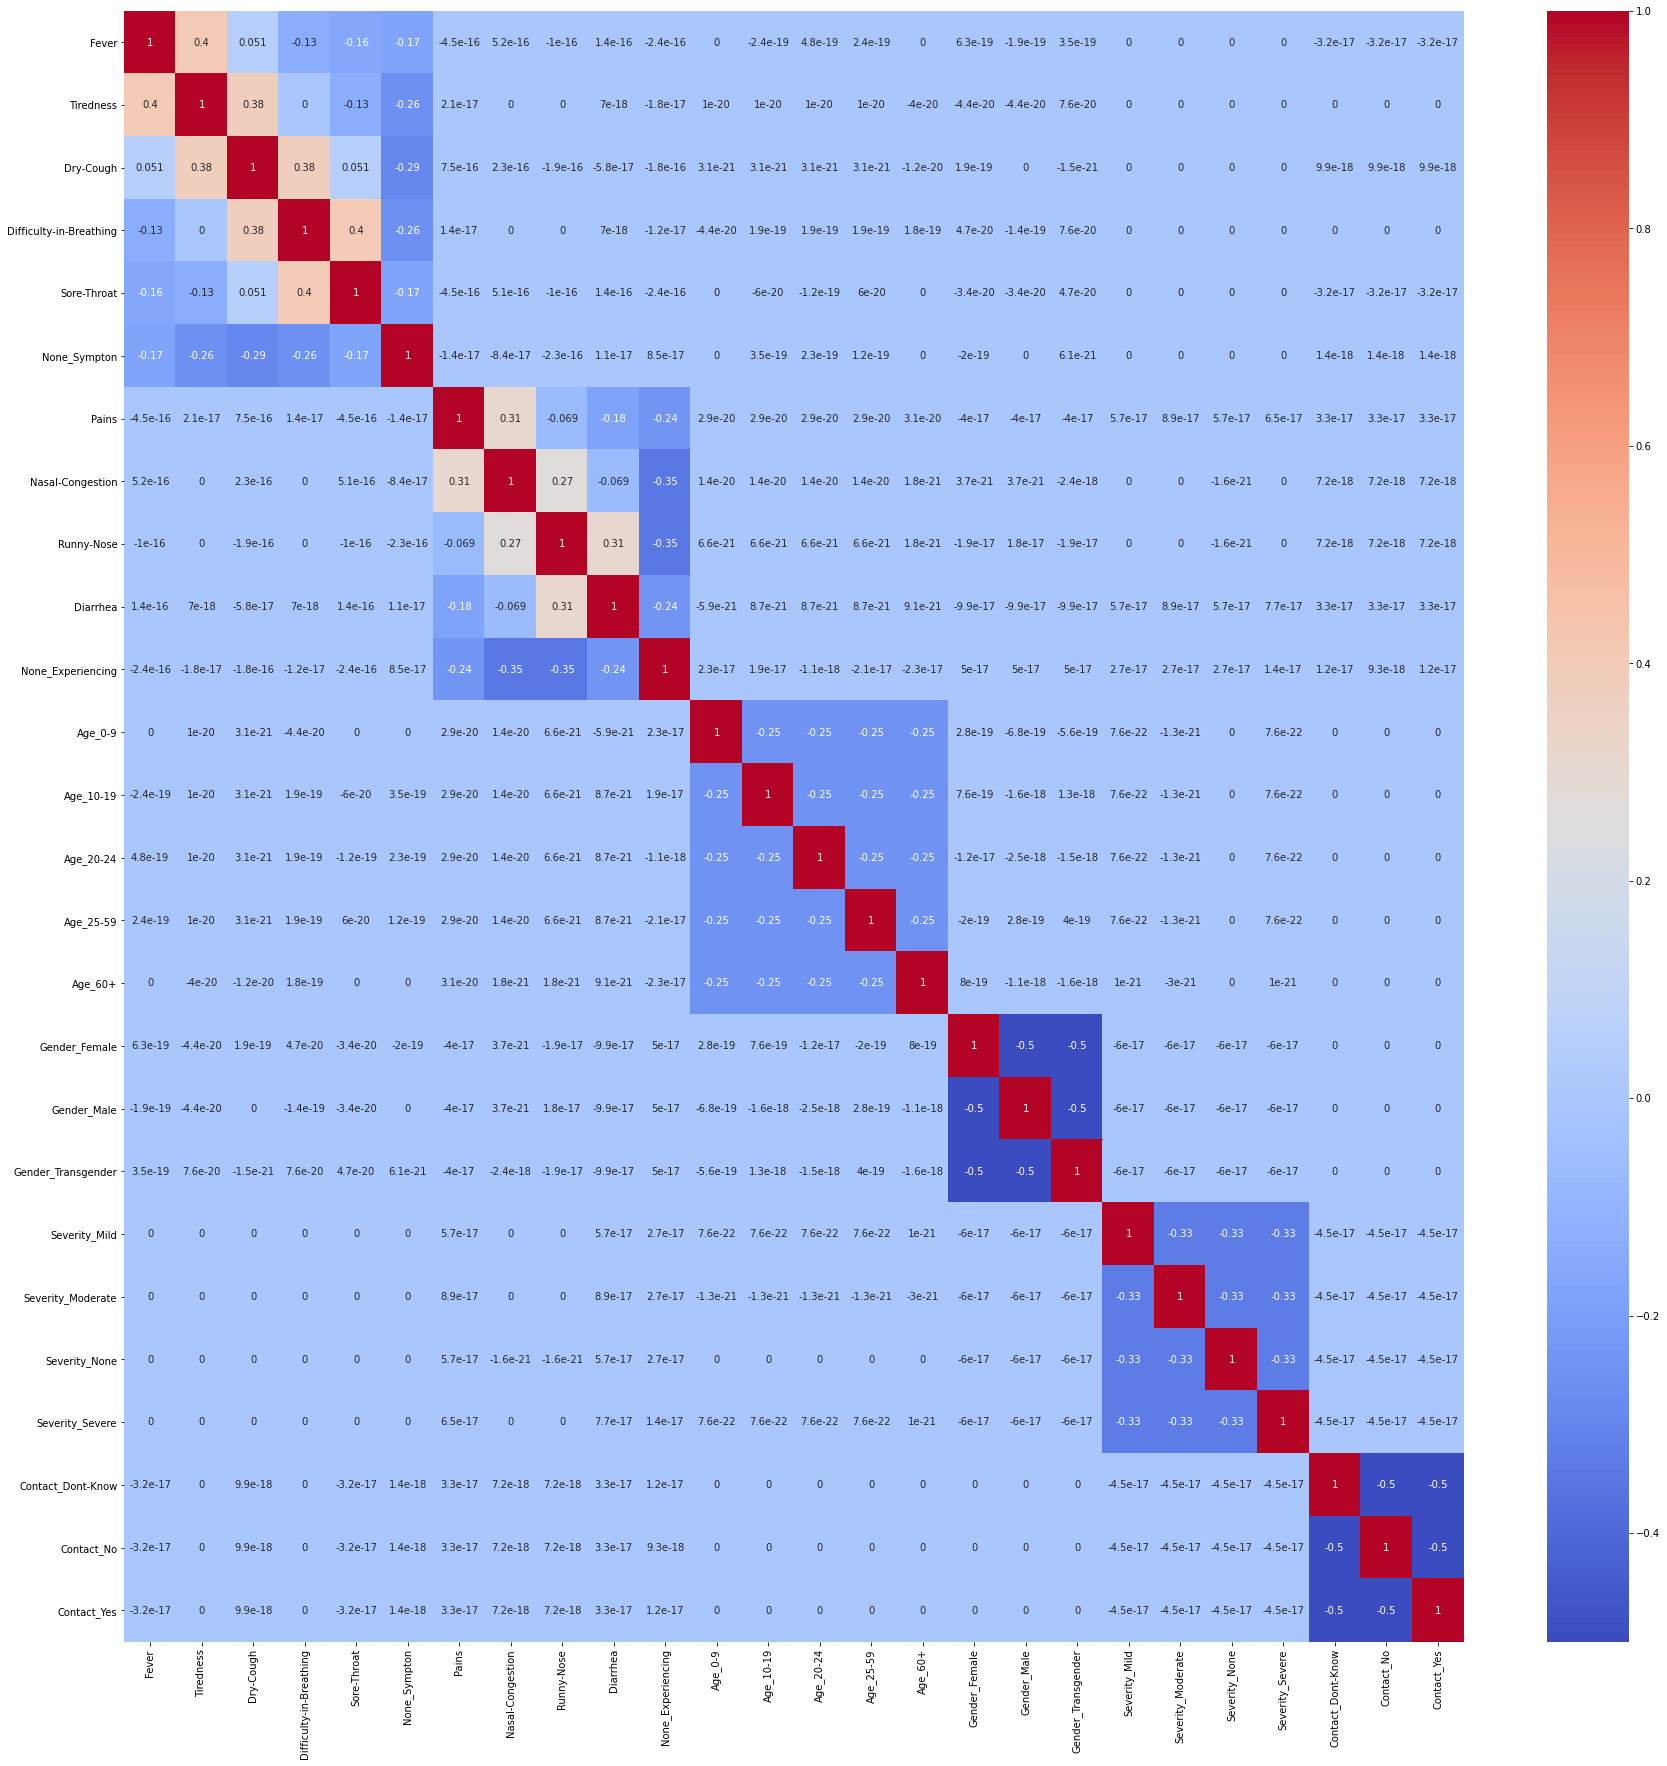

In [ ]:
figure = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe77494bd90>,
      dtype=object)

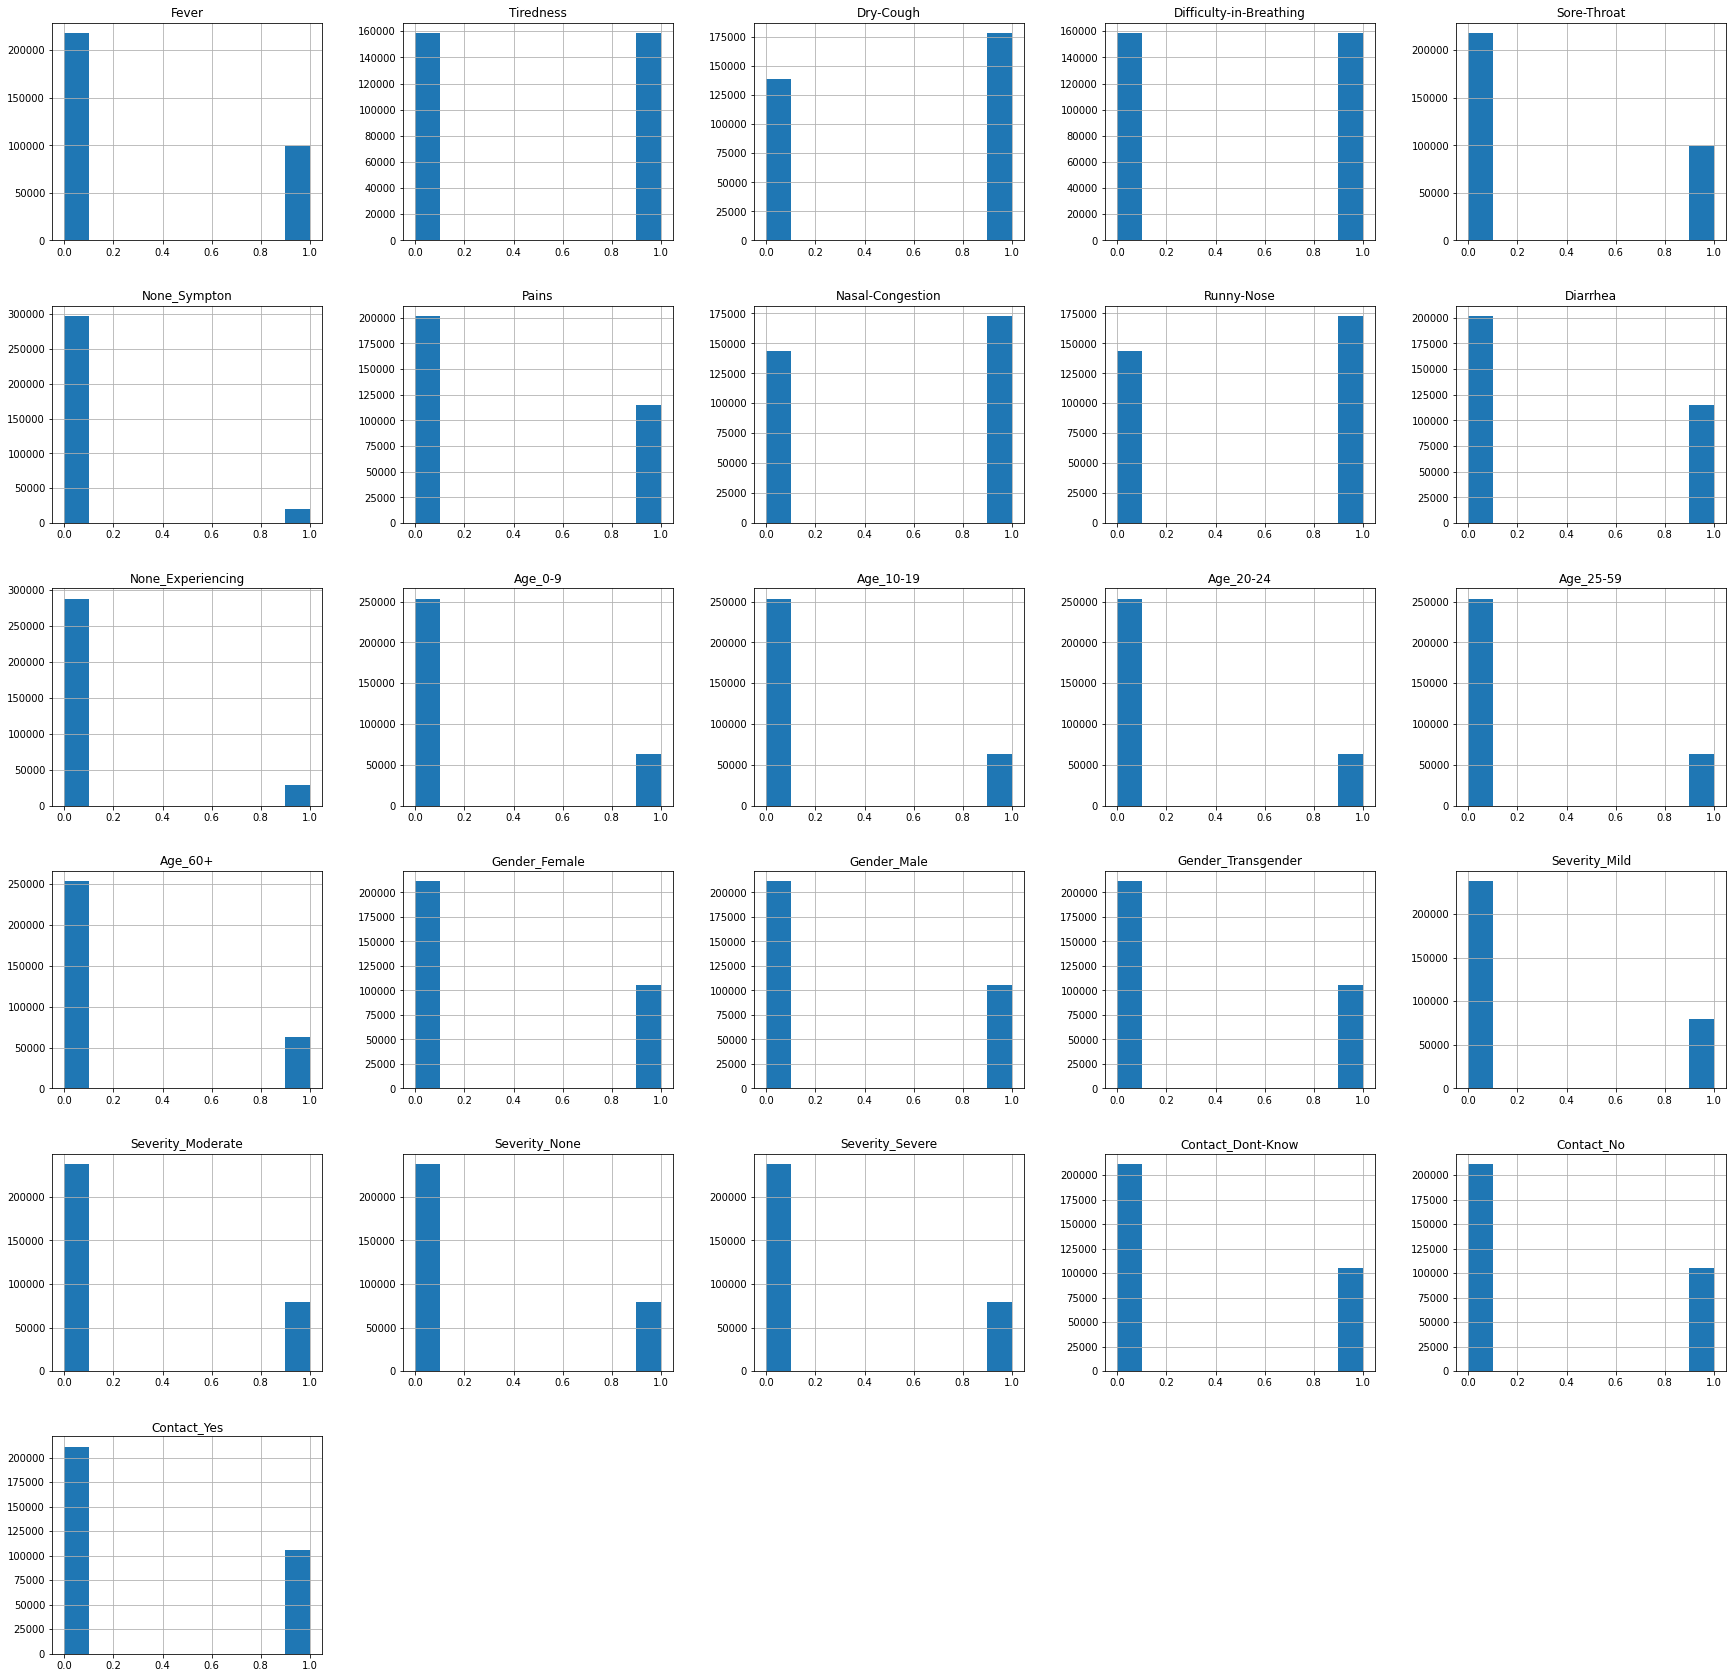

In [ ]:
df.hist(figsize=(30,30))

# Data Standardization

In [60]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes'],
      dtype='object')

# Data Preparation for Analysis

In [80]:
train_df=df.copy()

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)

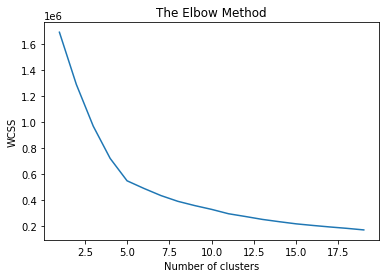

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# KMeans Clustering

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))

In [101]:
km_model=KMeans(n_clusters=7, random_state=2)
km_model.fit(train_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=2, tol=0.0001,
       verbose=0)

In [102]:
labels=km_model.labels_

In [103]:
import pickle
filename = 'clustered_model.sav'
covid_df = pd.DataFrame(km_model.cluster_centers_, columns=train_df.columns)
pickle.dump(km_model, open(filename, 'wb'))
covid_df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,-5.000000e-01,2.000000e+00,-5.000000e-01,-5.000000e-01,-5.000000e-01,3.179513e-17,1.084127e-14,1.084096e-14,-2.677432e-20,-8.924773e-21,-7.399702e-17,-8.924773e-21,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,2.000000e+00,-5.000000e-01,3.179513e-17,1.084127e-14,1.084096e-14,-2.677432e-20,-8.924773e-21,-7.399702e-17,-8.924773e-21,7.401487e-17,7.401487e-17,7.401487e-17
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,2.000000e+00,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,3.179513e-17,1.125747e-14,1.101472e-14,-1.855044e-20,7.522976e-21,-3.708005e-17,-7.008984e-22,7.401487e-17,7.401487e-17,7.401487e-17
3,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,2.000000e+00,3.179513e-17,1.084127e-14,1.084096e-14,-2.677432e-20,-8.924773e-21,-7.399702e-17,-8.924773e-21,7.401487e-17,7.401487e-17,7.401487e-17
4,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,-3.162278e-01,-5.000000e-01,-5.000000e-01,2.000000e+00,-5.000000e-01,-5.000000e-01,3.179513e-17,1.084127e-14,1.084096e-14,-2.677432e-20,-8.924773e-21,-7.399702e-17,-8.924773e-21,7.401487e-17,7.401487e-17,7.401487e-17
5,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.305247e-16,-3.224343e-16,4.303236e-16,5.375961e-17,5.385675e-16,-6.879913e-17,2.312965e-20,2.312965e-20,1.301148e-17,1.708650e-17,2.224358e-15,-2.141132e-16,-2.150763e-16,-6.938894e-20,-2.312965e-20,-7.396861e-17,-2.312965e-20,7.401487e-17,7.401487e-17,7.401487e-17
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,-7.559289e-01,-1.095445e+00,-1.095445e+00,-7.559289e-01,3.162278e+00,-7.418502e-17,1.714865e-20,1.714865e-20,8.585538e-18,2.248136e-17,2.875282e-15,-9.036029e-16,-9.038482e-16,-5.144594e-20,-1.714865e-20,-7.398057e-17,-1.714865e-20,7.401487e-17,7.401487e-17,7.401487e-17


***It appears that those from the sixth cluster do not have Covid disease***

In [113]:
kmeans_df = assign_model(km_model)
kmeans_df.sample(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
303166,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,Cluster 4
259347,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,Cluster 2
83882,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,Cluster 1
141569,1,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,Cluster 4
265603,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,Cluster 0
16373,0,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,Cluster 4
125037,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Cluster 3
32307,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,Cluster 2
62780,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Cluster 3
12298,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,Cluster 0


# PCA Projection

In [106]:
pca = PCA(n_components=3)
x = pca.fit_transform(train_df_scaled)
maindf = pd.DataFrame(data=x, columns=['PCA1', 'PCA2', 'PCA3'])

In [107]:
maindf

,PCA1,PCA2,PCA3
0,-1.988913,-1.809444,-0.127303
1,-1.996014,-2.032702,-0.074589
2,-1.963150,-1.889357,-0.189540
3,-2.076643,-2.065796,-0.199194
4,-2.083744,-2.289053,-0.146479
...,...,...,...
316795,3.441412,3.324944,0.084181
316796,3.474276,3.468288,-0.030770
316797,3.405684,3.199428,-0.029117
316798,3.398584,2.976170,0.023597


In [108]:
labels

array([2, 2, 2, ..., 5, 5, 5], dtype=int32)

In [109]:
maindf2 = pd.concat([maindf, pd.DataFrame({"Cluster":labels})],axis=1)
maindf2.sample(10)

,PCA1,PCA2,PCA3,Cluster
173232,-1.958961,-0.844163,0.116846,4
62115,-1.387925,-0.068508,-0.143713,3
157753,0.519511,-1.445955,0.014337,3
157367,0.809102,-1.475583,0.802414,3
10876,-0.896934,-1.679726,1.744581,0
168195,-0.386085,-0.156311,-0.775034,0
124303,0.810587,-0.155387,-0.716762,3
301853,1.167363,0.543813,-1.125176,4
241848,0.856543,-0.043601,1.010410,1
63610,-1.715186,0.146797,1.107618,2


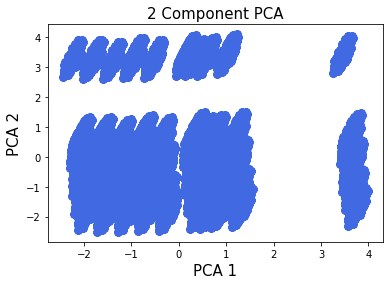

In [110]:
plt.figure()

plt.xlabel('PCA 1', fontsize = 15)
plt.ylabel('PCA 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 15)

plt.scatter(maindf2['PCA1'], maindf2['PCA2'], c='royalBlue', s = 50)

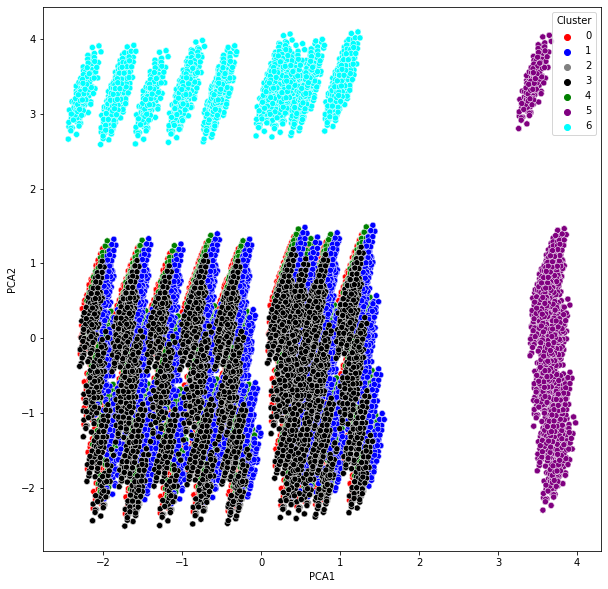

In [112]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue="Cluster",data=maindf2, palette=['red', 'blue', 'grey', 'black', 'green', 'purple', 'cyan'])
plt.show()

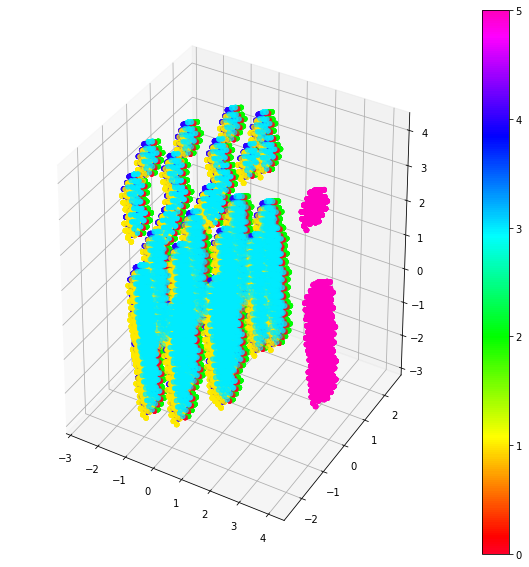

In [97]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=maindf2['PCA1'],ys=maindf2['PCA3'],zs=maindf2['PCA2'],c=maindf2['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()